In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_iris=iris.drop('species',axis=1)
y_iris=iris['species']
print(X_iris)
print(y_iris)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


# 선형회귀 수행

1. 데이터 수집

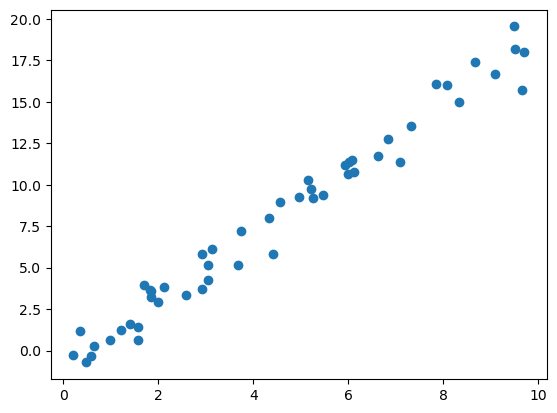

In [7]:
rng=np.random.RandomState(42)
x=10*rng.rand(50)

y=2*x-1+rng.randn(50)
plt.scatter(x,y)

2. 모델 선택 후 인스턴스 생성

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


[1.9776566]
-0.9033107255311146


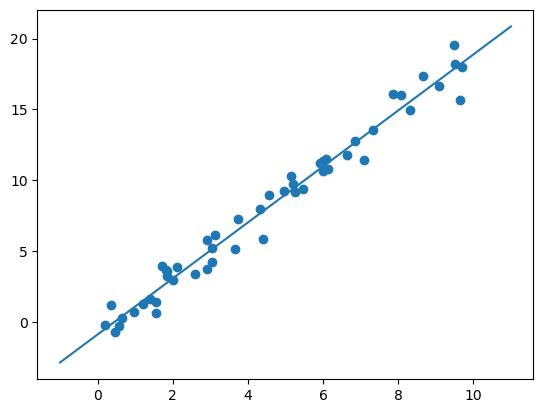

In [13]:
# 3. 모델 훈련

# 특징 벡터는 2차원 배열
# 1차원 배열 -> 2차원 배열 reshape 이용
# 열을 하나 추가해서 2차원으로 만듬
# 여기서는 2차원 으로 변경


model.fit(x[:,np.newaxis],y)
print(model.coef_) # 기울기
print(model.intercept_) # 절편


# 4 예측
x_fit=np.linspace(-1,11)
xfit=x_fit[:,np.newaxis]
yfit=model.predict(xfit)

plt.scatter(x,y)
plt.plot(xfit,yfit)

## 숫자 이미지 분류

### 1. 데이터 수집

In [15]:
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.images.shape)

(1797, 8, 8)


### 2. 데이터 탐색

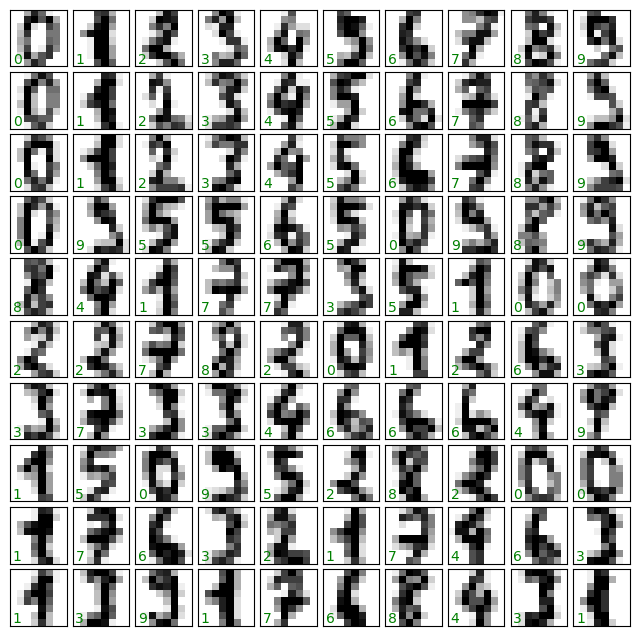

In [21]:
# print(digits.images[0])


# 100 개로 쪼개기
fig,axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1)) # ticks - 눈금선

# 실제 출력
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

### 3. 특징 배열과 타겟을 생성

In [27]:
x=digits.data
print(x.shape)
y=digits.target
print(y.shape)

# 훈련 데이터와 테스트 데이터 분리
# 옵션 없을 시 75:25 로 분할
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,random_state=42)

print(Xtrain.shape)
print(Xtest.shape)

(1797, 64)
(1797,)
(1347, 64)
(450, 64)


### 4. 분류 모델을 선택해서 훈련

In [28]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain,Ytrain)
# prediction
y_model=model.predict(Xtest)

### 5. 정확도 확인

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(Ytest,y_model)

0.8555555555555555

### 6. 오차행렬

[[41  0  0  0  0  1  0  1  0  0]
 [ 0 29  2  0  0  0  0  0  4  2]
 [ 0  2 23  0  0  0  1  0 12  0]
 [ 0  0  1 38  0  1  0  0  5  1]
 [ 0  0  0  0 46  0  2  7  0  0]
 [ 0  0  0  0  0 56  1  1  0  1]
 [ 0  0  0  0  1  1 43  0  0  0]
 [ 0  0  0  0  0  1  0 40  0  0]
 [ 0  2  0  0  0  0  0  2 34  0]
 [ 0  1  1  1  0  2  1  5  2 35]]


Text(113.9222222222222, 0.5, '실제')

/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  func(*args, **kwargs)
/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPyt

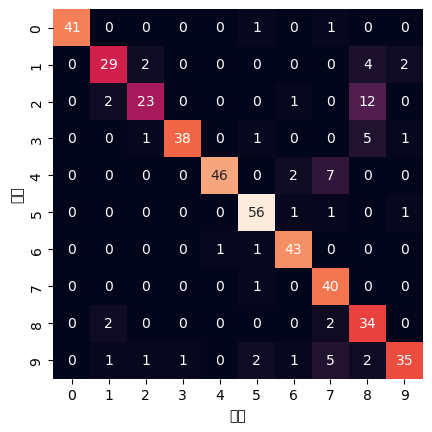

In [33]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(Ytest,y_model)
print(mat)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('예측')
plt.ylabel('실제')

### 7. 실제 이미지에서 잘못 분류된 데이터 확인

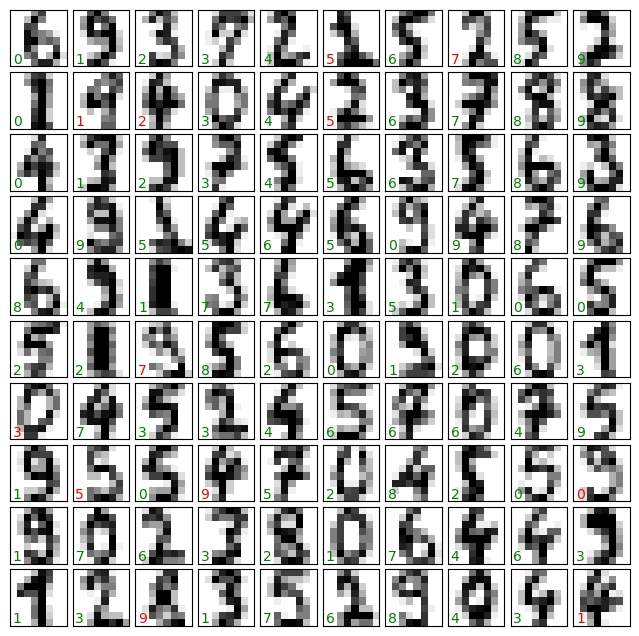

In [38]:
fig,axes=plt.subplots(10,10,figsize=(8,8),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.1,wspace=0.1))
test_images=Xtest.reshape(-1,8,8)
for i,ax in enumerate(axes.flat):
    ax.imshow(test_images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green' if (Ytest[i]==y_model[i])else 'red')
    

# PCA

### iris 데이터 주성분 분석

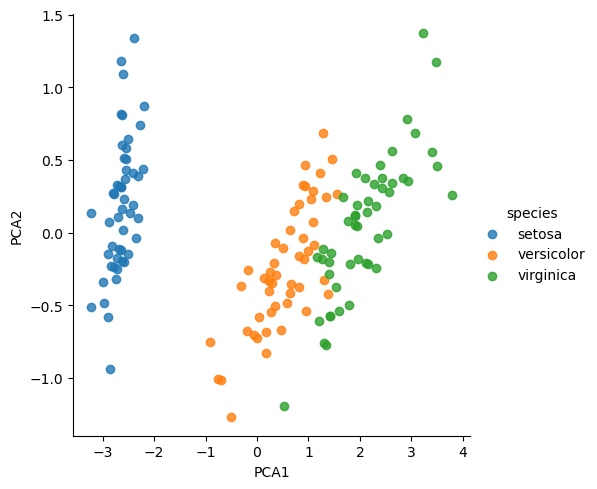

In [41]:
from sklearn.decomposition import PCA
model=PCA(n_components=2) # 2개 주성분
model.fit(X_iris) # 훈련 데이터와 테스트 데이터를 분할하지 않음
X_2D=model.transform(X_iris)

# 주성분 결과를 원본 데이터에 반영
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
sns.lmplot(x="PCA1",y="PCA2",hue='species',data=iris,fit_reg=False)


### 군집분석

In [43]:
from sklearn.mixture import GaussianMixture
model=GaussianMixture(n_components=3)
model.fit(X_iris)
y_gmm=model.predict(X_iris)
iris['cluster']=y_gmm
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

         PCA1      PCA2  cluster  
0   -2.684126  0.319397        0  
1   -2.714142 -0.177001        0  
2   -2.888991 -0.144949       

# 캘리포니아 주탁 가격 모델

In [44]:
import pandas as pd
# 데이터 가져오기
housing=pd.read_csv('./data/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [51]:
# 2 데이터 탐색

housing.info()
# 결측치가 존재한다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
# 범주형 가능성이 있는 데이터를 확인. - value_counts
print(housing['ocean_proximity'].value_counts())
# 값이 5개만 있기 때문에 범주형일 가능성이 높다. 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


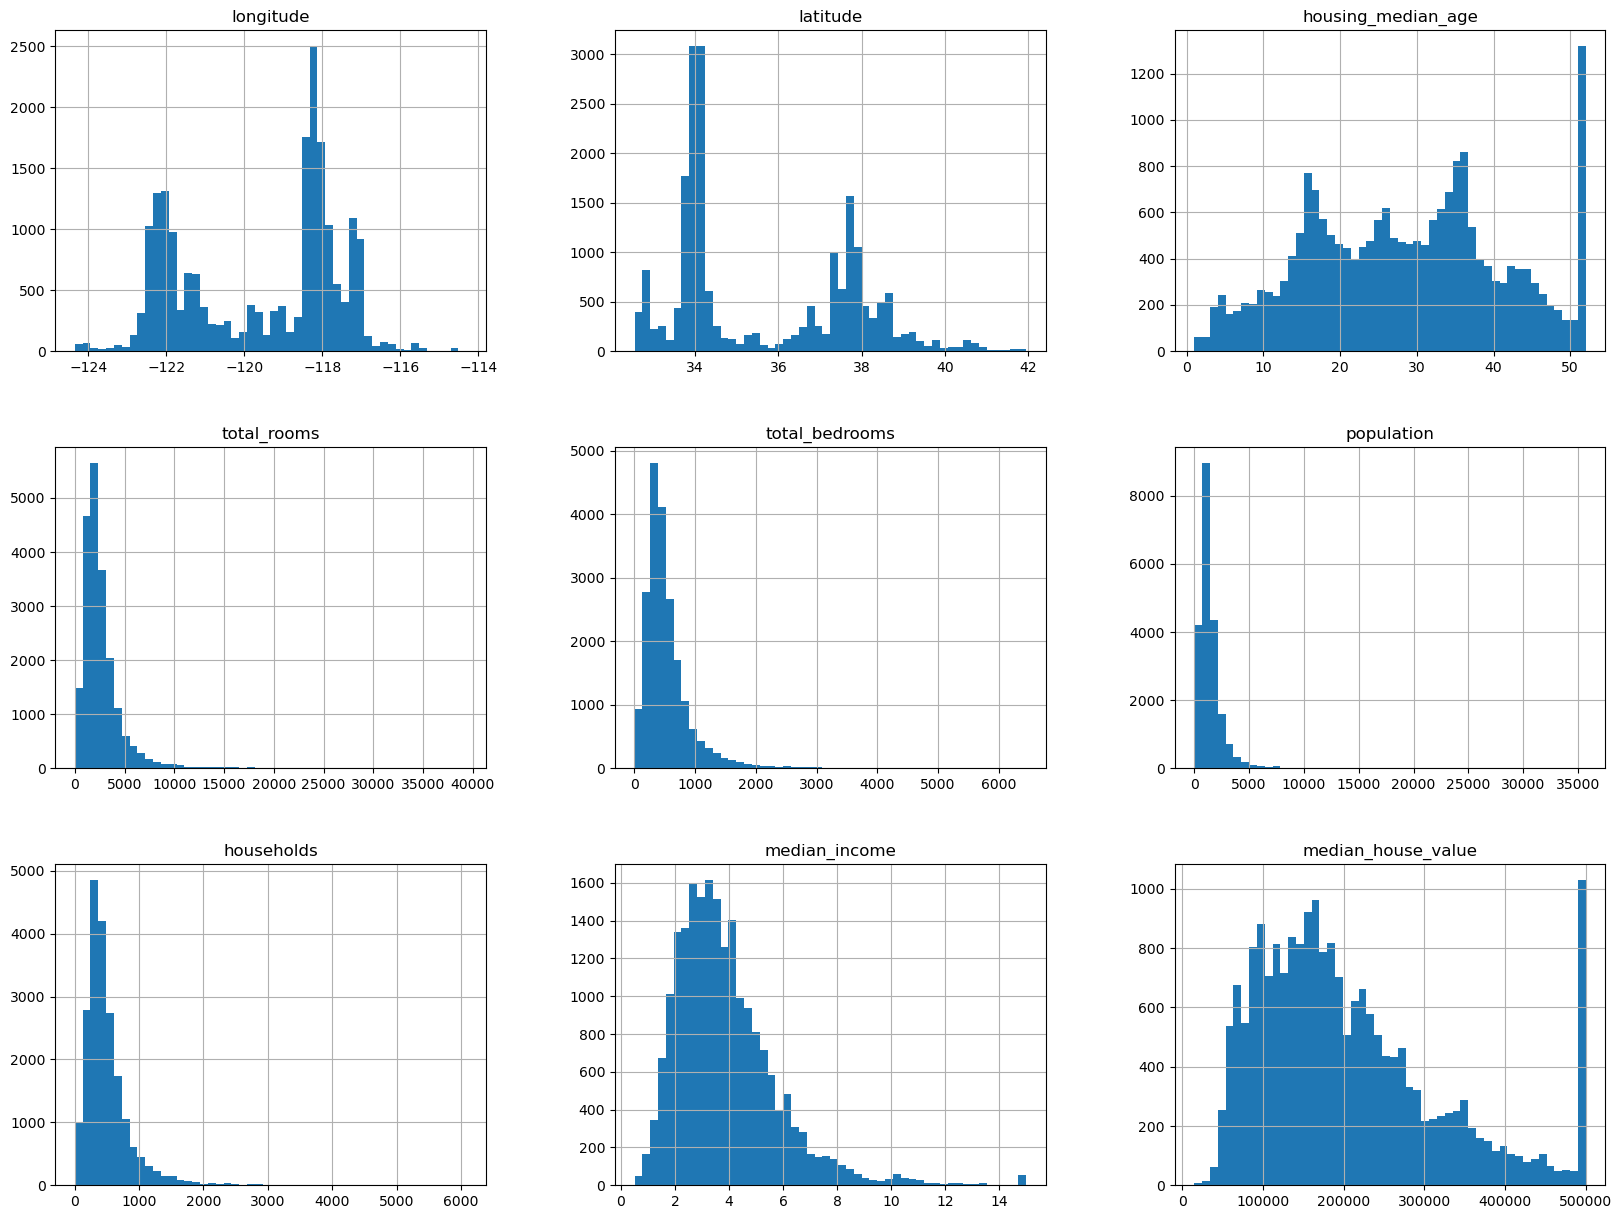

In [54]:
# 기술 통계량 확인
# housing.describe()

# 분포 확인
housing.hist(bins=50,figsize=(20,15))
plt.show()